# Projet mémoire
## Prédictions du prix de véhicules d'occasion

### Librairies & requierement 

In [124]:
import pandas                      as pd
import numpy                       as np
pd.set_option('display.max_columns', 50)
# Affichage graphique
import matplotlib.pyplot as plt
import seaborn as sns
# Modèles
from sklearn.linear_model          import LinearRegression
from sklearn.linear_model          import Ridge
from sklearn.linear_model          import LogisticRegression
from sklearn.naive_bayes           import GaussianNB
from sklearn.svm                   import SVR
from sklearn.ensemble              import RandomForestClassifier
from sklearn.model_selection       import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn                       import svm
from sklearn.linear_model          import Lasso
from sklearn.linear_model          import LassoLars
from sklearn.linear_model          import BayesianRidge
from sklearn.preprocessing         import PolynomialFeatures
from sklearn.linear_model          import SGDRegressor
from sklearn.neighbors             import KNeighborsRegressor
from sklearn.gaussian_process      import GaussianProcessRegressor
from sklearn.tree                  import DecisionTreeRegressor
from sklearn.ensemble              import RandomForestRegressor


# Preprocessing
from sklearn.preprocessing         import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection     import SelectKBest, f_classif, RFE
from sklearn.model_selection       import train_test_split, GridSearchCV
# Mesures
from sklearn.metrics               import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from sklearn.metrics               import mean_squared_error
from sklearn.metrics               import make_scorer, r2_score
# Exportation
import pickle
# Constantesimport pandas                      as pd
import numpy                       as np
pd.set_option('display.max_columns', 50)
# Affichage graphique
import matplotlib.pyplot as plt
import seaborn as sns
# Modèles
from sklearn.linear_model          import LinearRegression
from sklearn.linear_model          import Ridge
from sklearn.linear_model          import LogisticRegression
from sklearn.naive_bayes           import GaussianNB
from sklearn.svm                   import SVR
from sklearn.ensemble              import RandomForestClassifier
from sklearn.model_selection       import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold, train_test_split
from sklearn                       import svm


# Preprocessing
from sklearn.preprocessing         import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection     import SelectKBest, f_classif, RFE
from sklearn.model_selection       import train_test_split, GridSearchCV
# Mesures
from sklearn.metrics               import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
# Exportation
import pickle

In [158]:
#Confusion matrix
def get_cm(model, y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel("Prédictions")
    plt.ylabel("Originals")
    plt.show()

### Open the data

In [3]:
# On ouvre les données
df = pd.read_csv('autos.csv',sep= ",", error_bad_lines=False, encoding='latin-1')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [4]:
#Changing the columns names
df = df.rename(columns={"offerType" : 'offer_type', "postalCode" : "postal_code",'dateCrawled': 'exploration_date', 'abtest': 'ab_test', 'vehicleType': 'vehicle_type', 'yearOfRegistration': 'registration_year', "monthOfRegistration" : "registration_month", "powerPS" : "Power_HP" ,"nrOfPictures" : "nb_pictures" , "fuelType" : "fuel_type","dateCreated" : "created_date" , "notRepairedDamage" : "Damaged", "lastSeen" : "last_seen" })

### Data cleaning (null values and outliers)

In [5]:
df.describe(include="all")

,exploration_date,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,Power_HP,model,kilometer,registration_month,fuel_type,brand,Damaged,created_date,nb_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [6]:
# ALL Nan for postal_code : delete it
# 371528 but 371525 (seller) and 371516 (offer_type)
df["offer_type"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [7]:
df["seller"].unique()

array(['privat', 'gewerblich'], dtype=object)

In [8]:
df["nb_pictures"].unique()

array([0], dtype=int64)

In [9]:
#Delete the 3 columns
del df["seller"]
del df["offer_type"]
del df["nb_pictures"]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   exploration_date    371528 non-null  object
 1   name                371528 non-null  object
 2   price               371528 non-null  int64 
 3   ab_test             371528 non-null  object
 4   vehicle_type        333659 non-null  object
 5   registration_year   371528 non-null  int64 
 6   gearbox             351319 non-null  object
 7   Power_HP            371528 non-null  int64 
 8   model               351044 non-null  object
 9   kilometer           371528 non-null  int64 
 10  registration_month  371528 non-null  int64 
 11  fuel_type           338142 non-null  object
 12  brand               371528 non-null  object
 13  Damaged             299468 non-null  object
 14  created_date        371528 non-null  object
 15  postal_code         371528 non-null  int64 
 16  la

In [11]:
# Change values and rename from german to english

In [12]:
df.columns

Index(['exploration_date', 'name', 'price', 'ab_test', 'vehicle_type',
       'registration_year', 'gearbox', 'Power_HP', 'model', 'kilometer',
       'registration_month', 'fuel_type', 'brand', 'Damaged', 'created_date',
       'postal_code', 'last_seen'],
      dtype='object')

In [13]:
for names in df.columns:
    print(names)
    print(df[names].unique())

exploration_date
['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-14 17:48:27' '2016-03-19 18:57:12' '2016-03-07 19:39:19']
name
['Golf_3_1.6' 'A5_Sportback_2.7_Tdi' 'Jeep_Grand_Cherokee_"Overland"' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']
price
[  480 18300  9800 ... 18429 24895 10985]
ab_test
['test' 'control']
vehicle_type
[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
registration_year
[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1968 1982 1976 1983 1959 1973 1111
 1969 1971 1987 1986 1988 1967 1970 1965 1945 1925 1974 1979 1955 1978
 1972 1977 1961 1963 1964 1960 1966 1975 1937 1936 5000 1954 1958 9999
 1956 3200 1000 1933 1941 1962 8888 1500 2200 4100 1929 1951 1957 1940
 3000 2066 1949 2019 1800 1953 1935 1234

In [14]:
# rename from german to english
df.loc[(df.Damaged == 'ja'),'Damaged']='yes'
df.loc[(df.Damaged == 'nein'),'Damaged']='no'
df.loc[(df.fuel_type == 'benzin'),'fuel_type']='gasoline'
df = df.replace(['manuell','automatik','kleinwagen', 'limousine', 'cabrio', 'kombi', 'ander',"andere" , "elektro" ,"cng"], ['manual', 'automatic','urban','sedan','convertible','van','other', 'other',"electric","lpg"]) 


In [15]:
# Change date type for data viz and featuring
df["last_seen"] = pd.to_datetime(df["last_seen"])
df["created_date"] = pd.to_datetime(df["created_date"])
df["exploration_date"] = pd.to_datetime(df["exploration_date"])

In [16]:
# look at null values
df.isnull().sum()

exploration_date          0
name                      0
price                     0
ab_test                   0
vehicle_type          37869
registration_year         0
gearbox               20209
Power_HP                  0
model                 20484
kilometer                 0
registration_month        0
fuel_type             33386
brand                     0
Damaged               72060
created_date              0
postal_code               0
last_seen                 0
dtype: int64

In [17]:
df.drop(df.loc[df['fuel_type'].isnull()].loc[df['Damaged'].isnull()].loc[df['vehicle_type'].isnull()].loc[df['gearbox'].isnull()].loc[df['model'].isnull()]
.index, inplace=True)
# 2276 rows / nuls sur les 5 variables

In [18]:
df.drop(df.loc[df['fuel_type'].isnull()].loc[df['vehicle_type'].isnull()].loc[df['gearbox'].isnull()].loc[df['model'].isnull()].index , inplace=True)
# 2432 rows

In [19]:
# On regarde les valeurs nulles 
df.isnull().sum()

exploration_date          0
name                      0
price                     0
ab_test                   0
vehicle_type          35437
registration_year         0
gearbox               17777
Power_HP                  0
model                 18052
kilometer                 0
registration_month        0
fuel_type             30954
brand                     0
Damaged               69784
created_date              0
postal_code               0
last_seen                 0
dtype: int64

In [20]:
# 369096 rows

In [21]:
# 5 features avec beaucoup de valeurs nulles, certaines infos sont parfois dans le name, voyons si on peut en récupérer

In [22]:
df["fuel_type"].describe()

count       338142
unique           6
top       gasoline
freq        223857
Name: fuel_type, dtype: object

In [23]:
# All cars with TD in their name are diesel
for index, row in  df.loc[df["fuel_type"].isnull()].iterrows():
    check = row['name'].lower()
    if "tdi" in check: 
        df.loc[(df.index == index),'fuel_type'] = "diesel"
    elif "diesel" in check:
        df.loc[(df.index == index),'fuel_type'] = "diesel"
    elif "d" in check:
        for i in ["0d","1d","2d","3d","4d","5d","6d","7d","8d","9d"]:
            if i in check:
                df.loc[(df.index == index),'fuel_type'] = "diesel"
    elif "i" in check:
        for i in ["0i","1i","2i","3i","4i","5i","6i","7i","8i","9i"]:
            if i in check:
                df.loc[(df.index == index),'fuel_type'] = "gasoline"
            
#  30954 to 27436 = 

In [24]:
df.isnull().sum()

exploration_date          0
name                      0
price                     0
ab_test                   0
vehicle_type          35437
registration_year         0
gearbox               17777
Power_HP                  0
model                 18052
kilometer                 0
registration_month        0
fuel_type             27436
brand                     0
Damaged               69784
created_date              0
postal_code               0
last_seen                 0
dtype: int64

In [25]:
# clean le price 
df[df["price"] == 0].count()

exploration_date      10002
name                  10002
price                 10002
ab_test               10002
vehicle_type           7036
registration_year     10002
gearbox                8298
Power_HP              10002
model                  8594
kilometer             10002
registration_month    10002
fuel_type              7574
brand                 10002
Damaged                5445
created_date          10002
postal_code           10002
last_seen             10002
dtype: int64

In [26]:
# we need to delete it

In [27]:
df = df[df["price"] != 0]

In [28]:
df['price'].describe()

count    3.590940e+05
mean     1.740345e+04
std      3.645440e+06
min      1.000000e+00
25%      1.250000e+03
50%      3.000000e+03
75%      7.499000e+03
max      2.147484e+09
Name: price, dtype: float64

In [29]:
# Also check range for the price and date 

In [30]:
# Price range : on enelève les prix en dessous de 500 car ebay est un site d'enchères donc ces valeurs ne sont pas répresentative
df[df["price"] < 500]

,exploration_date,name,price,ab_test,vehicle_type,registration_year,gearbox,Power_HP,model,kilometer,registration_month,fuel_type,brand,Damaged,created_date,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,2016-03-24,70435,2016-04-07 03:16:57
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,450,test,urban,1910,NaN,0,ka,5000,0,gasoline,ford,NaN,2016-03-11,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,Polo_6n_1_4,300,test,NaN,2016,NaN,60,polo,150000,0,gasoline,volkswagen,NaN,2016-04-01,38871,2016-04-01 12:46:46
23,2016-03-12 19:43:07,Stadtflitzer,450,test,urban,1997,manual,50,arosa,150000,5,gasoline,seat,no,2016-03-12,9526,2016-03-21 01:46:11
32,2016-03-15 20:59:01,Golf_3_....._1.4,245,test,sedan,1994,NaN,0,golf,150000,2,gasoline,volkswagen,no,2016-03-15,44145,2016-03-17 18:17:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371464,2016-03-09 22:37:41,Seat_Arosa_/_1999_/_Tuev_06.2016,99,test,urban,1999,manual,60,arosa,150000,1,gasoline,seat,yes,2016-03-09,91301,2016-04-06 22:15:32
371473,2016-03-15 19:57:11,Subaru_Allrad,400,control,van,1991,manual,0,legacy,150000,0,gasoline,subaru,NaN,2016-03-15,24558,2016-03-19 15:49:00
371486,2016-03-30 20:55:30,Zu_verkaufen,350,control,urban,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,2016-03-30,25436,2016-04-07 13:50:41
371492,2016-04-04 14:41:28,Opel_Corsa_B_Swing_grau,390,test,urban,1997,automatic,0,corsa,100000,6,gasoline,opel,yes,2016-04-04,17509,2016-04-06 15:46:11


In [31]:
df = df.drop(df[df["price"] < 500].index)

In [32]:
df['price'].value_counts().sort_index(ascending=False)[:50]

2147483647     1
99999999      14
99000000       1
74185296       1
32545461       1
27322222       1
14000500       1
12345678       8
11111111       6
10000000       8
9999999        3
3895000        1
3890000        1
2995000        1
2795000        1
1600000        2
1300000        1
1250000        2
1234566        1
1111111        1
1010010        1
1000000        5
999999         9
999990         1
911911         1
849000         1
820000         1
780000         1
745000         2
725000         1
700000         1
650000         1
619000         1
600000         2
599000         1
585000         1
579000         1
517895         1
500000         2
488997         1
487000         1
485000         1
466000         1
445000         1
440000         1
420000         1
399997         1
395000         1
390000         1
370000         2
Name: price, dtype: int64

In [33]:
# Beaucoup de données aberrantes et comme c'est un extrème il vaut mieux s'enséparer
df = df.drop(df[df["price"] > 370000].index)

In [34]:
df['price'].value_counts().sort_index(ascending=False)[:50]

370000    2
368000    1
350000    4
349000    1
345000    1
323223    1
300000    1
299000    3
295000    1
294900    1
285000    1
284000    1
279000    1
275000    1
270000    1
265000    1
260000    3
259000    1
258000    1
257500    1
254900    1
250000    4
249000    1
245000    1
239000    1
238000    1
237500    1
235000    1
233000    1
230000    3
229900    1
229000    1
225000    5
224000    1
220000    1
219000    2
214800    1
208250    1
205000    2
200000    2
199900    1
198000    1
197500    1
197000    1
195900    1
195000    3
194000    1
192500    2
190000    1
189981    1
Name: price, dtype: int64

In [35]:
df['price'].describe()

count    334347.000000
mean       6332.611155
std        9111.485868
min         500.000000
25%        1500.000000
50%        3500.000000
75%        7950.000000
max      370000.000000
Name: price, dtype: float64

In [36]:
# Comme il n'y a pas beaucoup de valeurs sur les hauts prix je préférè retirer ces valeurs qui sont trés éloignés du 3ème quartile
df = df.drop(df[df["price"] > 150000].index)

In [37]:
df.isnull().sum()

exploration_date          0
name                      0
price                     0
ab_test                   0
vehicle_type          26426
registration_year         0
gearbox               12665
Power_HP                  0
model                 14387
kilometer                 0
registration_month        0
fuel_type             19678
brand                     0
Damaged               54517
created_date              0
postal_code               0
last_seen                 0
dtype: int64

In [38]:
df["kilometer"].value_counts()
# 150 000 est présent dans plus de la moitié des données ce qui semble correspondre à une limite

150000    212695
125000     35606
100000     14744
90000      11979
80000      10637
70000       9464
60000       8453
50000       7405
40000       6237
30000       5772
20000       5249
5000        4248
10000       1738
Name: kilometer, dtype: int64

In [39]:
# Date 
df["registration_year"].describe()
# max and min sont aberrants

count    334227.000000
mean       2004.348189
std          59.118586
min        1000.000000
25%        2000.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

In [40]:
# On garde entre 1900 et 2016 (date a laquelle on été récupéré les données)
df = df[df["registration_year"] > 1900]
df = df[df["registration_year"] < 2016]

In [41]:
df["exploration_date"].describe()

<ipython-input-41-84e5df1a4328>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["exploration_date"].describe()


count                  314109
unique                 247702
top       2016-03-24 14:49:47
freq                        6
first     2016-03-05 14:06:23
last      2016-04-07 14:36:58
Name: exploration_date, dtype: object

In [42]:
df[df["registration_month"] == 0]

,exploration_date,name,price,ab_test,vehicle_type,registration_year,gearbox,Power_HP,model,kilometer,registration_month,fuel_type,brand,Damaged,created_date,postal_code,last_seen
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,test,urban,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,27472,2016-03-31 17:17:06
36,2016-03-11 11:50:37,Opel_Kadett_E_CC,1600,control,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN,2016-03-11,2943,2016-04-07 03:46:09
54,2016-03-17 07:56:40,Opel_signum_1.9_cdti,4700,control,van,2005,manual,0,signum,150000,0,NaN,opel,no,2016-03-17,88433,2016-04-04 04:17:32
70,2016-04-01 11:56:40,Opel_astra_g_coupe_1.8_liter_benziner,1200,test,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN,2016-04-01,47249,2016-04-07 08:46:07
96,2016-03-28 16:37:43,unfall_Opel_insignia_voll_Ausstattung__TÜV_neu...,8390,test,NaN,2009,NaN,0,insignia,150000,0,NaN,opel,NaN,2016-03-28,29221,2016-03-30 07:44:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371399,2016-03-07 16:37:42,Fiat_Stilo_Abarth_2.4_5zylinder_Seelespeed,560,control,urban,2001,automatic,170,NaN,90000,0,gasoline,fiat,yes,2016-03-07,55743,2016-03-12 21:45:25
371424,2016-04-04 13:55:18,A6_4f_3.0Tdi_Quattro_25_Jahre_Quattro_Edition,9000,control,van,2005,manual,0,a6,150000,0,diesel,audi,NaN,2016-04-04,99869,2016-04-06 15:16:47
371460,2016-04-03 13:46:24,Polo_g40_auch_Tausch_vag...no_vr6_gti_1.8t,3500,control,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,2016-04-03,74579,2016-04-05 12:44:38
371482,2016-03-31 19:36:18,Peugeot_206,1300,control,urban,1999,manual,75,2_reihe,125000,0,NaN,peugeot,NaN,2016-03-31,35102,2016-04-06 13:44:44


In [43]:
df["registration_month"].unique()
# Le mois 0 existe ce qui ne veut pas dire grand chose -> regardera la correlation de cette variable plus tard

array([ 5,  8,  6,  7, 10,  0, 12, 11,  2,  3,  1,  4,  9], dtype=int64)

In [44]:
df["created_date"].describe()

<ipython-input-44-c9997a735063>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["created_date"].describe()


count                  314109
unique                    113
top       2016-04-03 00:00:00
freq                    12408
first     2014-03-10 00:00:00
last      2016-04-07 00:00:00
Name: created_date, dtype: object

In [45]:
df.isnull().sum()
# We have less null values

exploration_date          0
name                      0
price                     0
ab_test                   0
vehicle_type           6665
registration_year         0
gearbox               10458
Power_HP                  0
model                 11890
kilometer                 0
registration_month        0
fuel_type             13353
brand                     0
Damaged               45962
created_date              0
postal_code               0
last_seen                 0
dtype: int64

### Before beginning the imputation let's drop the duplicate because they could make error and also be in the test and train set ath the same time

In [46]:
# 314109 rows

In [47]:
df[df.duplicated(['price','vehicle_type','registration_year' ,'gearbox','Power_HP','model','kilometer','registration_month','fuel_type' ,'Damaged'], keep = False)]

,exploration_date,name,price,ab_test,vehicle_type,registration_year,gearbox,Power_HP,model,kilometer,registration_month,fuel_type,brand,Damaged,created_date,postal_code,last_seen
13,2016-03-21 21:37:40,VW_PASSAT_1.9_TDI_131_PS_LEDER,2500,control,van,2004,manual,131,passat,150000,2,diesel,volkswagen,no,2016-03-21,90762,2016-03-23 02:50:54
14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,17999,control,suv,2011,manual,190,navara,70000,3,diesel,nissan,no,2016-03-21,4177,2016-04-06 07:45:42
20,2016-04-01 19:56:48,Volkswagen_Scirocco_1.4_TSI_Sport,10400,control,coupe,2009,manual,160,scirocco,100000,4,gasoline,volkswagen,no,2016-04-01,75365,2016-04-05 16:45:49
27,2016-03-07 12:51:23,Honda_Civic_1.4_i_VTEC_Comfort,6900,test,sedan,2008,manual,99,civic,60000,11,gasoline,honda,no,2016-03-07,12621,2016-03-26 09:44:53
47,2016-04-04 00:38:22,BMW_528i_touring,2100,test,van,1998,automatic,193,5er,150000,2,gasoline,bmw,no,2016-04-03,86157,2016-04-06 08:16:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371493,2016-03-05 18:57:45,Top_Zustand,3299,test,NaN,2005,automatic,0,outlander,150000,4,gasoline,mitsubishi,NaN,2016-03-05,17034,2016-03-06 04:17:37
371494,2016-03-26 14:38:18,BMW_760_erst_110_000_km_letze_Chance_bis_Monta...,11500,control,sedan,2004,automatic,445,7er,125000,0,gasoline,bmw,NaN,2016-03-26,4107,2016-04-06 20:45:16
371510,2016-03-06 21:11:23,Mercedes_benz_e_klasse_avangarde_220_cdi_grune...,6500,test,sedan,2003,automatic,145,e_klasse,150000,3,diesel,mercedes_benz,no,2016-03-05,60437,2016-03-12 12:18:05
371513,2016-03-21 15:36:22,Seat_Leon_1.9_TDI_4/5_Tueren,4400,control,sedan,2008,manual,105,leon,150000,7,diesel,seat,no,2016-03-21,45896,2016-04-06 15:45:01


In [48]:
df[df["brand"] == "nissan"].loc[df["kilometer"] == 70000].loc[df["Power_HP"] == 190]

,exploration_date,name,price,ab_test,vehicle_type,registration_year,gearbox,Power_HP,model,kilometer,registration_month,fuel_type,brand,Damaged,created_date,postal_code,last_seen
14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,17999,control,suv,2011,manual,190,navara,70000,3,diesel,nissan,no,2016-03-21,4177,2016-04-06 07:45:42
235305,2016-03-21 13:57:37,Nissan_Navara_Pickup_SE_2_5DCi_DbleCab+Klima+4...,17999,test,suv,2011,manual,190,navara,70000,3,diesel,nissan,no,2016-03-21,4177,2016-04-06 09:46:52


In [49]:
# Let's delete theses row
df = df.drop(df[df.duplicated(['price','vehicle_type','registration_year' ,'gearbox','Power_HP','model','kilometer','registration_month','fuel_type' ,'Damaged'])].index)

### Imputation

In [50]:
# 288975 rows

In [51]:
# on va essayer de remplir fuel_type, et gearbox avec des moyennes sur les modèles puis les marques

In [52]:
pivot_fuel = df[["model","fuel_type"]]
pivot_gearbox = df[["model","gearbox"]]
pivot_vehicle = df[["model","vehicle_type"]]
pivot_fuel = pivot_fuel.pivot_table(index="model", columns="fuel_type" , aggfunc=len, fill_value=0)
pivot_gearbox = pivot_gearbox.pivot_table(index="model", columns="gearbox" , aggfunc=len, fill_value=0)
pivot_vehicle = pivot_vehicle.pivot_table(index="model", columns="vehicle_type" , aggfunc=len, fill_value=0)

In [53]:
dict_fuel = dict(pivot_fuel.idxmax(axis=1))
dict_gearbox = dict(pivot_gearbox.idxmax(axis=1))
dict_vehicle = dict(pivot_vehicle.idxmax(axis=1))
df["fuel_type"] = df['fuel_type'].fillna(df["model"].map(dict_fuel))
df["gearbox"] = df['gearbox'].fillna(df["model"].map(dict_gearbox))
df["vehicle_type"] = df['vehicle_type'].fillna(df["model"].map(dict_vehicle))

In [54]:
df.isnull().sum()

exploration_date          0
name                      0
price                     0
ab_test                   0
vehicle_type            870
registration_year         0
gearbox                 914
Power_HP                  0
model                 11443
kilometer                 0
registration_month        0
fuel_type              2095
brand                     0
Damaged               43069
created_date              0
postal_code               0
last_seen                 0
dtype: int64

In [55]:
df["Damaged"].describe()

count     245906
unique         2
top           no
freq      222013
Name: Damaged, dtype: object

In [56]:
# Pour notRepairedDamage , dans le recherche d'un véhicule si l'historique est inconnu c'est à prendre en compte
# Créons donc une troisième valeur inconnu 
# création d'un deuxième dataset car je ne suis pas très sure pour cette feature
df['Damaged'] = df['Damaged'].fillna("Unknow")

In [57]:
df.isnull().sum()

exploration_date          0
name                      0
price                     0
ab_test                   0
vehicle_type            870
registration_year         0
gearbox                 914
Power_HP                  0
model                 11443
kilometer                 0
registration_month        0
fuel_type              2095
brand                     0
Damaged                   0
created_date              0
postal_code               0
last_seen                 0
dtype: int64

In [58]:
# il reste encore des valeurs nulles , surtout 11 000 pour les modèles
# de plus on a déjà retiré 60 000 lignes (prix nul ou aberrants)

In [59]:
# On remarque que les lignes ou le modèle est inconnu sont aussi ou les autres données sont inconnus, beaucoup d'algo scikit-learn ne supporte pas les valeurs nulles, elles ne represente pas non plus une majorité des données

In [60]:
# Extraction de nom puis finit on supprimer le reste
model = [""]
model = ["esprit","_ka_","joice","nitro","_156_","transit","ibiza","eldorado","passat","fiesta","firebird","granada","607","z3","safari","meriva","evora","_q7_","espace","scenic",""]
i = 0
for index, row in  df.loc[df["model"].isnull()].iterrows():
    check = row['name'].lower()
    #print(check)
    if "polo" in check:
        df.loc[(df.index == index),'model'] = "polo"
    elif "golf" in check:
        df.loc[(df.index == index),'model'] = "golf"
    elif "lupo" in check:
        df.loc[(df.index == index),'model'] = "lupo"
    elif "bora" in check:
        df.loc[(df.index == index),'model'] = "bora"
    elif "caddy" in check:
        df.loc[(df.index == index),'model'] = "caddy"
    elif "307" in check:
        df.loc[(df.index == index),'model'] = "307"
    elif "mondeo" in check:
        df.loc[(df.index == index),'model'] = "mondeo"
    elif "twingo" in check:
        df.loc[(df.index == index),'model'] = "twingo"
    elif "clio" in check:
        df.loc[(df.index == index),'model'] = "clio"
    elif "206" in check:
        df.loc[(df.index == index),'model'] = "206"
    elif "107" in check:
        df.loc[(df.index == index),'model'] = "107"
    elif "focus" in check:
        df.loc[(df.index == index),'model'] = "focus"
    elif "galaxy" in check:
        df.loc[(df.index == index),'model'] = "galaxy"
    elif "406" in check:
        df.loc[(df.index == index),'model'] = "406"
    elif "z06" in check:
        df.loc[(df.index == index),'model'] = "z06"
    elif "giuletta" in check:
        df.loc[(df.index == index),'model'] = "giuletta"
    elif "touran" in check:
        df.loc[(df.index == index),'model'] = "touran"
    elif "touareg" in check:
        df.loc[(df.index == index),'model'] = "touareg"
    elif "carisma" in check:
        df.loc[(df.index == index),'model'] = "carisma"
    elif "ram" in check:
        df.loc[(df.index == index),'model'] = "ram"
    elif "avenger" in check:
        df.loc[(df.index == index),'model'] = "avenger"
    elif "micra" in check:
        df.loc[(df.index == index),'model'] = "micra"
    elif "leon" in check:
        df.loc[(df.index == index),'model'] = "leon"
    elif "punto" in check:
        df.loc[(df.index == index),'model'] = "punto"
    elif "astra" in check:
        df.loc[(df.index == index),'model'] = "astra"
    elif "vectra" in check:
        df.loc[(df.index == index),'model'] = "vectra"
    elif "corsa" in check:
        df.loc[(df.index == index),'model'] = "corsa"
    elif "alhambra" in check:
        df.loc[(df.index == index),'model'] = "alhambra"
    elif "a" in check:
        for i in ["a1","a2","a3","a4","a5","a6","a7","a8","s6"]:
            if i in check:
                df.loc[(df.index == index),'model'] = i
#             else:
#                 print("pass  " + check)
    else:
        model = ["_c6_","boxer","_cls_","fusion","407","_c1_","306","_c3_","elise","_c2_","_c4_","807","306","106","esprit","_ka_","joice","nitro","_156_","transit","ibiza","eldorado","passat","fiesta","firebird","granada","607","z3","safari","meriva","evora","_q7_","espace","scenic"]
        for mod in model: 
            if str(mod) in check:
                #print(check)
                df.loc[(df.index == index),'model'] = mod


In [61]:
df.isnull().sum()

exploration_date         0
name                     0
price                    0
ab_test                  0
vehicle_type           870
registration_year        0
gearbox                914
Power_HP                 0
model                 7884
kilometer                0
registration_month       0
fuel_type             2095
brand                    0
Damaged                  0
created_date             0
postal_code              0
last_seen                0
dtype: int64

In [62]:
# Since we filled the model we will detelet the others rows becaus we want to avoid null value and this rows have no standart name for the majority

In [63]:
# Finishing we delete the last aan rows
df = df[df['model'].notna()]

In [64]:
# 281091 rows

In [65]:
df.isnull().sum()

exploration_date        0
name                    0
price                   0
ab_test                 0
vehicle_type          275
registration_year       0
gearbox               228
Power_HP                0
model                   0
kilometer               0
registration_month      0
fuel_type             730
brand                   0
Damaged                 0
created_date            0
postal_code             0
last_seen               0
dtype: int64

In [66]:
pivot_fuel = df[["model","fuel_type"]]
pivot_gearbox = df[["model","gearbox"]]
pivot_vehicle = df[["model","vehicle_type"]]
pivot_fuel = pivot_fuel.pivot_table(index="model", columns="fuel_type" , aggfunc=len, fill_value=0)
pivot_gearbox = pivot_gearbox.pivot_table(index="model", columns="gearbox" , aggfunc=len, fill_value=0)
pivot_vehicle = pivot_vehicle.pivot_table(index="model", columns="vehicle_type" , aggfunc=len, fill_value=0)

In [67]:
dict_fuel = dict(pivot_fuel.idxmax(axis=1))
dict_gearbox = dict(pivot_gearbox.idxmax(axis=1))
dict_vehicle = dict(pivot_vehicle.idxmax(axis=1))
df["fuel_type"] = df['fuel_type'].fillna(df["model"].map(dict_fuel))
df["gearbox"] = df['gearbox'].fillna(df["model"].map(dict_gearbox))
df["vehicle_type"] = df['vehicle_type'].fillna(df["model"].map(dict_vehicle))

In [68]:
df.isnull().sum()

exploration_date      0
name                  0
price                 0
ab_test               0
vehicle_type          0
registration_year     0
gearbox               0
Power_HP              0
model                 0
kilometer             0
registration_month    0
fuel_type             2
brand                 0
Damaged               0
created_date          0
postal_code           0
last_seen             0
dtype: int64

In [69]:
df = df[df['fuel_type'].notna()]

### End of the data cleaning (outliers, null values)

In [70]:
# 281089 rows

In [71]:
df.info()
# 17 columns and 314 109 rows (vs 371 528 ) : 16 %

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281089 entries, 1 to 371527
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   exploration_date    281089 non-null  datetime64[ns]
 1   name                281089 non-null  object        
 2   price               281089 non-null  int64         
 3   ab_test             281089 non-null  object        
 4   vehicle_type        281089 non-null  object        
 5   registration_year   281089 non-null  int64         
 6   gearbox             281089 non-null  object        
 7   Power_HP            281089 non-null  int64         
 8   model               281089 non-null  object        
 9   kilometer           281089 non-null  int64         
 10  registration_month  281089 non-null  int64         
 11  fuel_type           281089 non-null  object        
 12  brand               281089 non-null  object        
 13  Damaged             281089 no

In [72]:
diff = (pd.to_datetime(df.exploration_date) - pd.to_datetime(df.created_date)).dt.days
diff[diff != 0]

42         1
47         1
68        41
102        1
148        1
          ..
371388     1
371453     1
371485     1
371488     1
371503     1
Length: 9107, dtype: int64

In [73]:
diff.unique()
# Only 10 000 row where the delay between creation and exploration date is superior as 1 day

array([  0,   1,  41,   2,  13,   5,   6,  26,  51,   8,  16,   3, 369,
        17,  14,   4, 286,  18,  36,   7,  11,  10,  46, 124,  15,  21,
        23,  19,  57,  20,  43,   9,  24,  32,  37,  12,  38, 113,  28,
        59,  34,  40,  29,  22,  61, 109, 737,  27,  31,  54,  92, 192,
       123,  69,  25, 111,  39,  48,  55, 100, 239, 122,  58,  35,  33,
        30,  62,  64,  78,  52,  56,  81, 118, 143,  42,  53, 211,  73,
        49,  68,  76,  44,  45,  47,  85, 134, 103,  65, 178, 261,  66],
      dtype=int64)

In [74]:
diff2 = (pd.to_datetime(df.last_seen) - pd.to_datetime(df.created_date)).dt.days
diff2[diff2 != 0]

1         14
2         22
4          6
5          2
6          4
          ..
371518     4
371524     6
371525    19
371526     4
371527    15
Length: 246329, dtype: int64

In [75]:
diff2.unique()

array([ 14,  22,   0,   6,   2,   4,  11,  17,  16,  13,  19,   1,  27,
        12,   8,   3,  18,  51,  21,  28,  15,  20,  23,   5,  25,   9,
        24,  10,   7,  29,  26,  30,  31,  33,  32,  37,  59,  41, 384,
        35,  36, 300,  48,  45,  40,  79, 136,  42,  52,  63,  61,  34,
        49,  46, 122,  53,  47,  60,  38,  39,  50,  44,  88,  43, 141,
       759,  55,  58,  94, 193, 146,  91,  54, 133,  56,  62, 108, 244,
        68,  65, 144,  78,  80,  89,  83, 150,  81,  69, 152,  72, 239,
        95,  67,  64,  90,  57,  98,  66, 110, 149, 121,  73,  71, 209,
       292,  99,  97], dtype=int64)

In [76]:
# diff 2 has 265 843 -> we create a new column 
df["day_in"] = diff2

In [77]:
# Imputation is requiered because a lot of mode don't handle str data, so imputation (second part for str values ) will make a lot a change in the data
# We keep a copy of the dataframe for vizualization
df_plot = df.copy()

### Change all string features in numerical

In [78]:
# We need nuemrical features , so let's translate the maximun features as possibles

In [79]:
df['exploration_date'] = df['exploration_date'].apply(lambda x: x.value)

In [80]:
df['exploration_date'] = df['exploration_date'].apply(lambda x: int(x/(10**9)))

In [81]:
df['created_date'] = df['created_date'].apply(lambda x: x.value)

In [82]:
df['created_date'] = df['created_date'].apply(lambda x: int(x/(10**9)))

In [83]:
df['last_seen'] = df['last_seen'].apply(lambda x: x.value)

In [84]:
df['last_seen'] = df['last_seen'].apply(lambda x: int(x/(10**9)))

In [85]:
# We changed the date but if the correlation is too low we will delete the 3 columns since we created a features Day_in

In [86]:
df.dtypes

exploration_date       int64
name                  object
price                  int64
ab_test               object
vehicle_type          object
registration_year      int64
gearbox               object
Power_HP               int64
model                 object
kilometer              int64
registration_month     int64
fuel_type             object
brand                 object
Damaged               object
created_date           int64
postal_code            int64
last_seen              int64
day_in                 int64
dtype: object

In [87]:
# Damaged has 3 value (yes and no from default and I add unknow wich was an idea but maybe we may go back and turn it to no)
# Let's map it
dict_damaged = {'no':0, "yes":1, "Unknow" : 2}
df["Damaged"]=df.Damaged.map(dict_damaged)

In [88]:
df["Damaged"]

1         1
2         2
3         0
4         0
5         1
         ..
371520    1
371524    0
371525    0
371526    2
371527    0
Name: Damaged, Length: 281089, dtype: int64

In [89]:
df.shape

(281089, 18)

In [90]:
df["ab_test"].describe()

count     281089
unique         2
top         test
freq      145830
Name: ab_test, dtype: object

In [91]:
# Name are too long and complicated and what is interesting in name is brand or model and we already have it
# ab_test is a Ebay variable which is don't releveant here (value test or control)
# We're dropping both
del df["name"]
del df["ab_test"]

In [92]:
df["Damaged"] = df["Damaged"].apply(pd.to_numeric)

In [93]:
# Stay 5 string features : vehicle_type and fuel_type and gearbow are less than 10 different values, let's One-Hot encoding

In [94]:
df["brand"].unique() # 46 values .... but we will convert model so we need to keep the brand to define model mean price 

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'honda', 'fiat',
       'opel', 'mini', 'smart', 'subaru', 'volvo', 'mitsubishi',
       'hyundai', 'alfa_romeo', 'kia', 'seat', 'suzuki', 'lancia',
       'porsche', 'citroen', 'toyota', 'chevrolet', 'sonstige_autos',
       'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover',
       'saab', 'land_rover', 'trabant', 'lada'], dtype=object)

In [95]:
dummies = pd.get_dummies(df[["brand","fuel_type","gearbox","vehicle_type"]])

In [96]:
mean_model_price = df.groupby('model').mean()
#mean_model_price = mean_mode_price["price"]
base = mean_model_price.T.iloc[1:2,]
base.T

,price
model,
100,2108.763934
106,787.590909
107,3782.058824
145,1294.458333
147,2411.483589
...,...
yeti,14489.303371
ypsilon,1773.714286
z06,44866.500000


In [97]:
df = df.replace({"model": base})

In [98]:
df

,exploration_date,price,vehicle_type,registration_year,gearbox,Power_HP,model,kilometer,registration_month,fuel_type,brand,Damaged,created_date,postal_code,last_seen,day_in
1,1458817125,18300,coupe,2011,manual,190,21683.205980,125000,5,diesel,audi,1,1458777600,66954,1459993610,14
2,1457959941,9800,suv,2004,automatic,163,8573.749097,125000,8,diesel,jeep,2,1457913600,90480,1459860466,22
3,1458233644,1500,urban,2001,manual,75,5376.979941,150000,6,gasoline,volkswagen,0,1458172800,91074,1458236417,0
4,1459445120,3600,urban,2008,manual,69,4246.569155,90000,7,diesel,skoda,0,1459382400,60437,1459937841,6
5,1459791383,650,sedan,1995,manual,102,6358.330406,150000,10,gasoline,bmw,1,1459728000,33775,1459970227,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,1458417229,3200,sedan,2004,manual,225,8197.099405,150000,5,gasoline,seat,1,1458345600,96465,1458420283,0
371524,1457207781,1199,convertible,2000,automatic,101,3723.612196,125000,3,gasoline,smart,0,1457136000,26135,1457720232,6
371525,1458413832,9200,bus,1996,manual,102,10516.239831,150000,3,diesel,volkswagen,0,1458345600,87439,1460013326,19
371526,1458502868,3400,van,2002,manual,100,5376.979941,150000,6,diesel,volkswagen,2,1458432000,40764,1458823521,4


In [99]:
# we gonna make multiples classe : min : 500 , max : 150 000 but 50 % : 3 400 and 75 % 8000
# So 4 class : 500 - 1500 , 1500 - 3500 , 3500 - 8000 , > 8000

In [100]:
df["model"] = df["model"].apply(pd.to_numeric)

In [101]:
df["model"].describe()

count    281089.000000
mean       6413.905855
std        4719.701003
min         787.590909
25%        3544.613948
50%        5376.979941
75%        7530.746108
max       54586.682045
Name: model, dtype: float64

In [102]:
df["model"] = pd.cut(df['model'], bins=[0,1000,2500,5000,7500,10000,25000,60000], right=True, labels=False)+1

In [103]:
df = pd.concat([df,dummies ], axis=1, sort=False)
del df["gearbox"]
del df["brand"]
del df["vehicle_type"]
del df["fuel_type"]
df

,exploration_date,price,registration_year,Power_HP,model,kilometer,registration_month,Damaged,created_date,postal_code,last_seen,day_in,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,fuel_type_diesel,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,gearbox_automatic,gearbox_manual,vehicle_type_bus,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_suv,vehicle_type_urban,vehicle_type_van
1,1458817125,18300,2011,190,6,125000,5,1,1458777600,66954,1459993610,14,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1457959941,9800,2004,163,5,125000,8,2,1457913600,90480,1459860466,22,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1458233644,1500,2001,75,4,150000,6,0,1458172800,91074,1458236417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1459445120,3600,2008,69,3,90000,7,0,1459382400,60437,1459937841,6,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,1459791383,650,1995,102,4,150000,10,1,1459728000,33775,1459970227,2,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,1458417229,3200,2004,225,5,150000,5,1,1458345600,96465,1458420283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
371524,1457207781,1199,2000,101,3,125000,3,0,1457136000,26135,1457720232,6,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
371525,1458413832,9200,1996,102,6,150000,3,0,1458345600,87439,1460013326,19,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
371526,1458502868,3400,2002,100,4,150000,6,2,1458432000,40764,1458823521,4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [104]:
df.dtypes

exploration_date      int64
price                 int64
registration_year     int64
Power_HP              int64
model                 int64
                      ...  
vehicle_type_other    uint8
vehicle_type_sedan    uint8
vehicle_type_suv      uint8
vehicle_type_urban    uint8
vehicle_type_van      uint8
Length: 68, dtype: object

In [105]:
df.isnull().sum()

exploration_date      0
price                 0
registration_year     0
Power_HP              0
model                 0
                     ..
vehicle_type_other    0
vehicle_type_sedan    0
vehicle_type_suv      0
vehicle_type_urban    0
vehicle_type_van      0
Length: 68, dtype: int64

### A lot of the new feaures will be useless but we get a try

### Dataset is clea and ready !

### Data Vizualisation

In [106]:
sns.set(rc={'figure.figsize':(15,15)})

In [107]:
df_plot.isnull().sum()

exploration_date      0
name                  0
price                 0
ab_test               0
vehicle_type          0
registration_year     0
gearbox               0
Power_HP              0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
Damaged               0
created_date          0
postal_code           0
last_seen             0
day_in                0
dtype: int64

In [108]:
df_plot["vehicle_type"].unique()

array(['coupe', 'suv', 'urban', 'sedan', 'convertible', 'bus', 'van',
       'other'], dtype=object)

<AxesSubplot:xlabel='vehicle_type', ylabel='Count'>

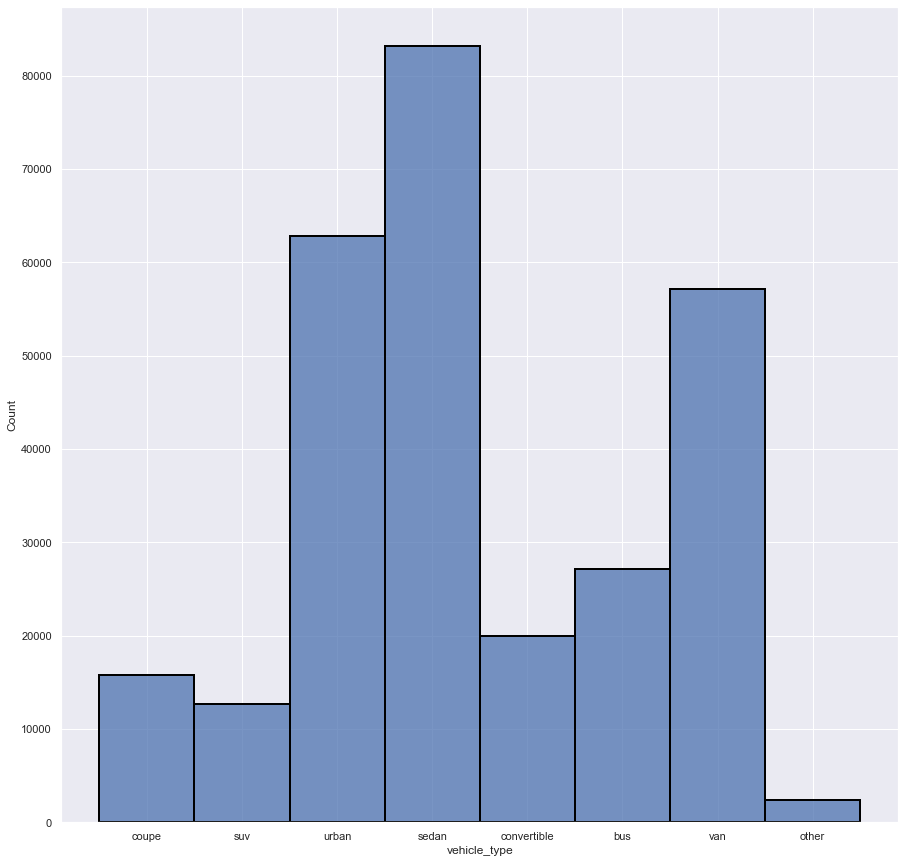

In [109]:
sns.histplot(data=df_plot, x="vehicle_type",edgecolor="black", linewidth=2)

<AxesSubplot:ylabel='gearbox'>

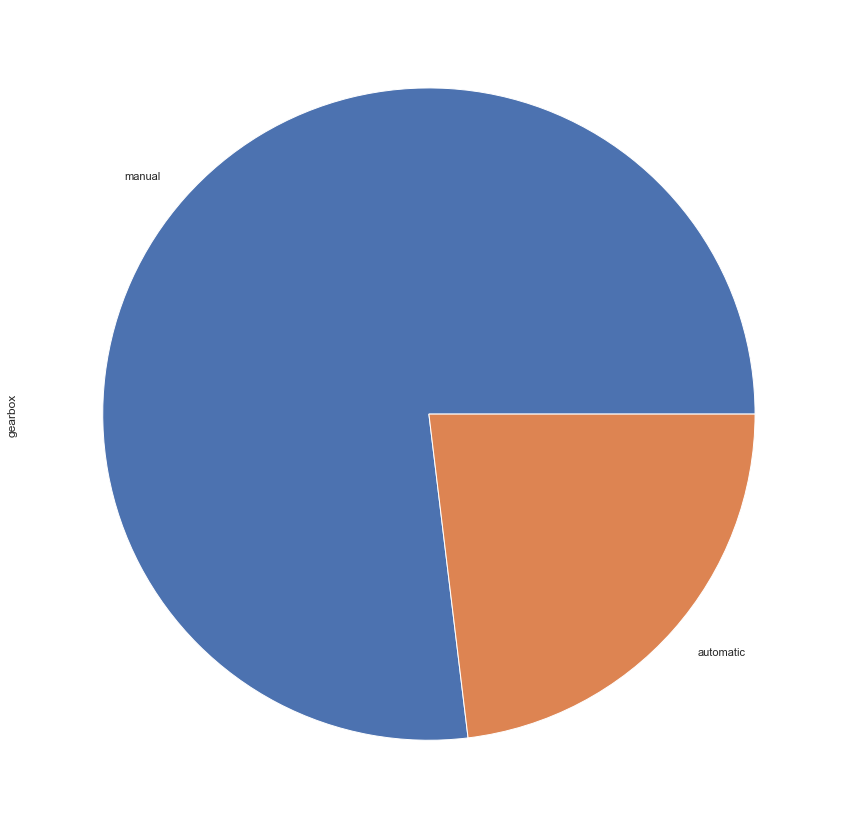

In [110]:
df_plot['gearbox'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='fuel_type'>

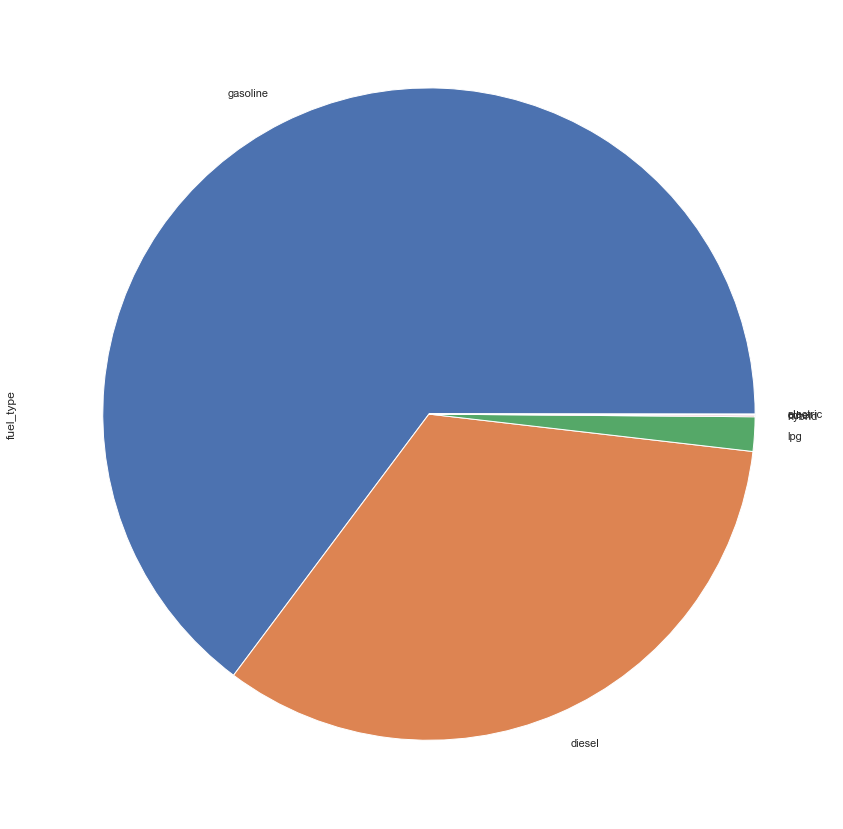

In [111]:
df_plot['fuel_type'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='price', ylabel='Count'>

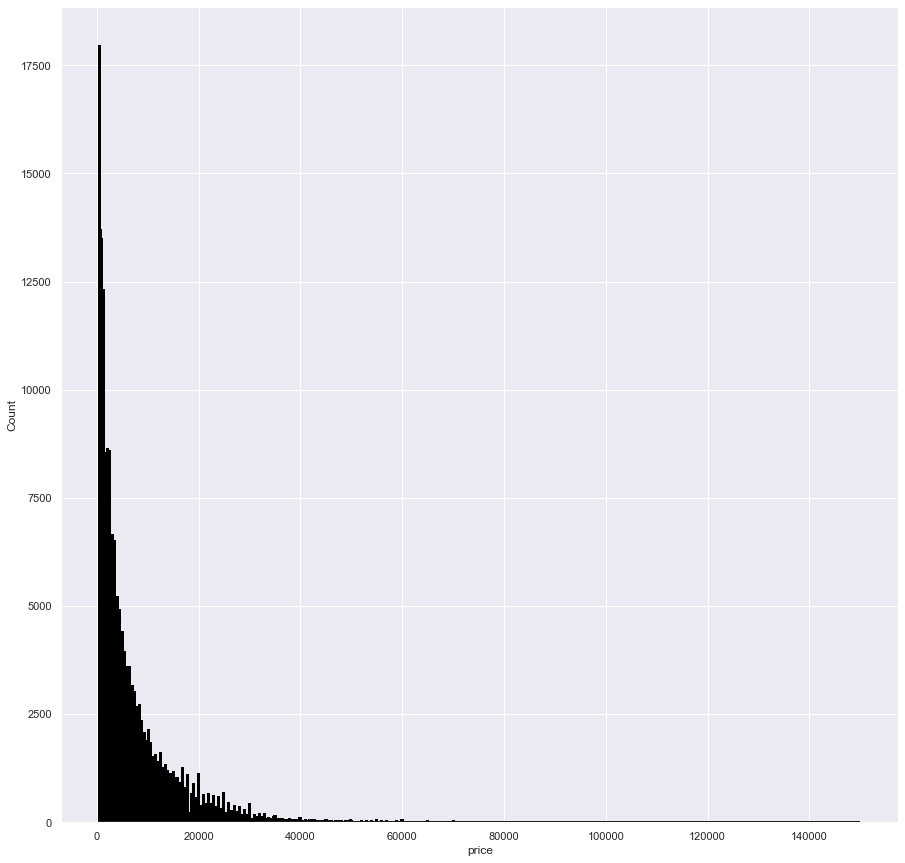

In [112]:
sns.histplot(data=df_plot, x="price",edgecolor="black", linewidth=2)

<AxesSubplot:xlabel='kilometer', ylabel='Count'>

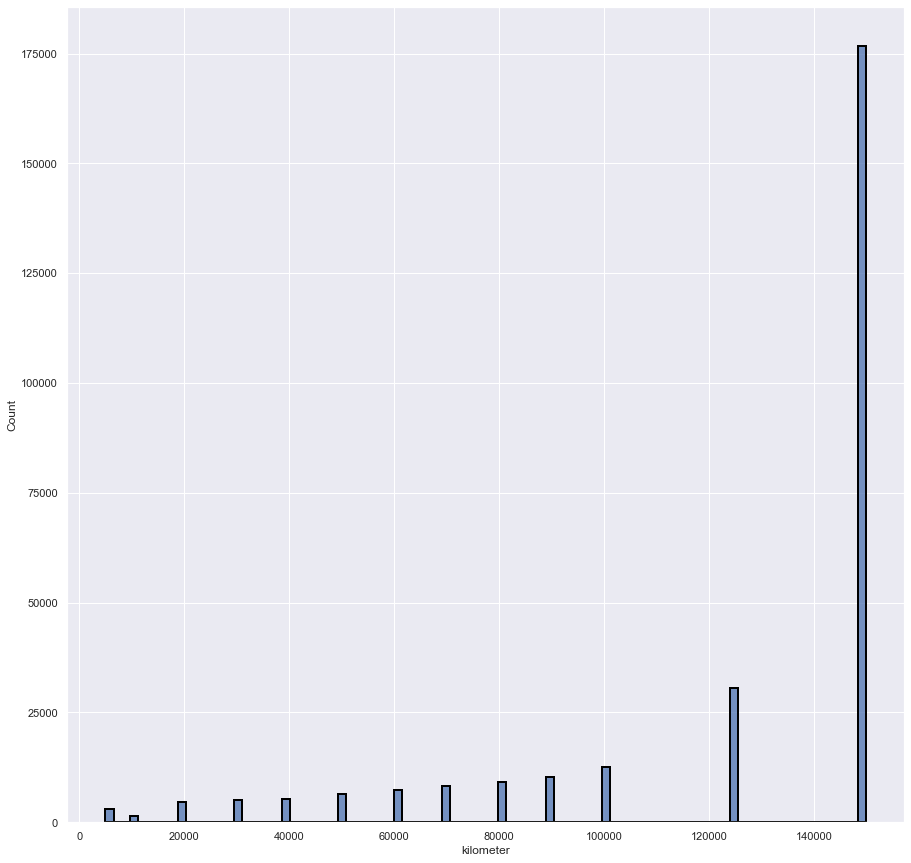

In [113]:
sns.histplot(data=df_plot, x="kilometer",edgecolor="black", linewidth=2)

In [114]:
df["kilometer"].unique()

array([125000, 150000,  90000,  30000,  70000, 100000,  60000,   5000,
        20000,  80000,  50000,  40000,  10000], dtype=int64)

In [115]:
# Correlation
pd.set_option('display.max_rows', 500)
corr = df.corr()
print(corr["price"].sort_values(ascending=False))

price                       1.000000
model                       0.465410
registration_year           0.394702
brand_porsche               0.320286
gearbox_automatic           0.296824
fuel_type_diesel            0.202687
Power_HP                    0.190940
vehicle_type_suv            0.188010
last_seen                   0.139980
vehicle_type_coupe          0.138933
vehicle_type_convertible    0.134007
day_in                      0.126485
brand_audi                  0.125666
brand_bmw                   0.109785
brand_mercedes_benz         0.096850
postal_code                 0.076848
brand_land_rover            0.062178
brand_mini                  0.046940
registration_month          0.039751
brand_jaguar                0.038013
brand_sonstige_autos        0.033922
brand_jeep                  0.029963
fuel_type_hybrid            0.024907
exploration_date            0.018986
created_date                0.016039
vehicle_type_bus            0.014152
brand_chevrolet             0.008483
f

In [116]:
corr["price"].sort_values(ascending=False) < 0.01

price                       False
model                       False
registration_year           False
brand_porsche               False
gearbox_automatic           False
fuel_type_diesel            False
Power_HP                    False
vehicle_type_suv            False
last_seen                   False
vehicle_type_coupe          False
vehicle_type_convertible    False
day_in                      False
brand_audi                  False
brand_bmw                   False
brand_mercedes_benz         False
postal_code                 False
brand_land_rover            False
brand_mini                  False
registration_month          False
brand_jaguar                False
brand_sonstige_autos        False
brand_jeep                  False
fuel_type_hybrid            False
exploration_date            False
created_date                False
vehicle_type_bus            False
brand_chevrolet              True
fuel_type_electric           True
brand_skoda                  True
brand_kia     

In [164]:
df

,exploration_date,price,registration_year,Power_HP,model,kilometer,registration_month,Damaged,created_date,postal_code,last_seen,day_in,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,fuel_type_diesel,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,gearbox_automatic,gearbox_manual,vehicle_type_bus,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_suv,vehicle_type_urban,vehicle_type_van
1,1458817125,18300,2011,190,6,125000,5,1,1458777600,66954,1459993610,14,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1457959941,9800,2004,163,5,125000,8,2,1457913600,90480,1459860466,22,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1458233644,1500,2001,75,4,150000,6,0,1458172800,91074,1458236417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1459445120,3600,2008,69,3,90000,7,0,1459382400,60437,1459937841,6,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,1459791383,650,1995,102,4,150000,10,1,1459728000,33775,1459970227,2,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,1458417229,3200,2004,225,5,150000,5,1,1458345600,96465,1458420283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
371524,1457207781,1199,2000,101,3,125000,3,0,1457136000,26135,1457720232,6,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
371525,1458413832,9200,1996,102,6,150000,3,0,1458345600,87439,1460013326,19,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
371526,1458502868,3400,2002,100,4,150000,6,2,1458432000,40764,1458823521,4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


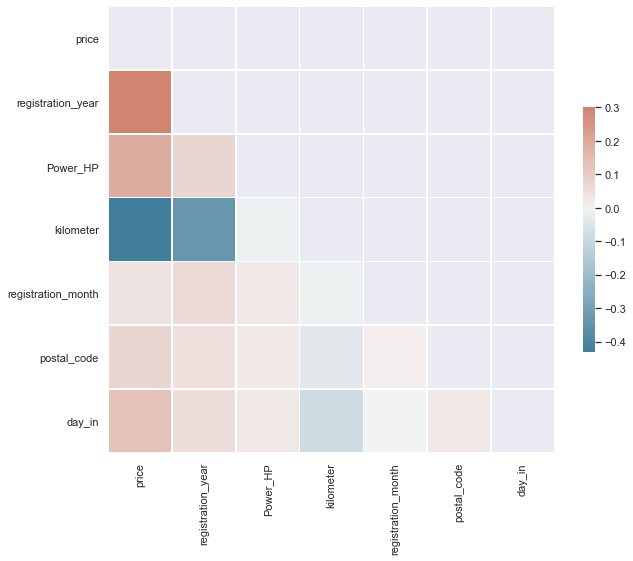

In [117]:
corr_plot = df_plot.corr()
mask = np.triu(np.ones_like(corr_plot, dtype=bool))
f, ax = plt.subplots(figsize=(10, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_plot, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [118]:
# postal_code and registration_month are not very correled we will see

In [119]:
# We could withdraw a lot of features but let's try some model first

### Train test split

In [120]:
x_train, x_test, y_train, y_test = train_test_split(df, df.iloc[:,1] , random_state=1998, test_size=0.3)

In [121]:
del x_test["price"]
del x_train["price"]

In [122]:
x_train

,exploration_date,registration_year,Power_HP,model,kilometer,registration_month,Damaged,created_date,postal_code,last_seen,day_in,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,...,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,fuel_type_diesel,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,gearbox_automatic,gearbox_manual,vehicle_type_bus,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_suv,vehicle_type_urban,vehicle_type_van
340086,1459813854,2005,75,3,150000,6,0,1459728000,70619,1460020521,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
356714,1457794163,1997,150,5,150000,3,0,1457740800,16515,1457937901,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
248999,1458752355,1997,122,4,150000,1,2,1458691200,31737,1458755100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
248572,1457354356,2004,231,4,150000,6,0,1457308800,32339,1459534739,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
296,1459439319,2009,140,4,125000,12,0,1459382400,26931,1459439319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341327,1458730665,2004,101,5,100000,8,0,1458691200,79423,1460031408,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
133471,1458643038,2002,75,4,150000,1,2,1458604800,56814,1458758736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
332800,1457645141,2001,75,3,150000,6,0,1457568000,55481,1457731674,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
92905,1458147292,2004,90,3,90000,3,0,1458086400,8451,1459631920,17,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
# Model list
#reg = linear_model.LinearRegression()
#reg = linear_model.Ridge(alpha=.5)
# reg = linear_model.Lasso(alpha=0.1)
# reg = linear_model.LassoLars(alpha=.1)
# reg = linear_model.BayesianRidge()
# poly = PolynomialFeatures(degree=2)
# regr = svm.SVR()
# SGDRegressor : fitter = SGDRegressor(loss="squared_loss", penalty=None)
# KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
# GaussianProcessRegressor(kernel=None, *, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None)
# clf = tree.DecisionTreeRegressor()
# RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]¶
# quantile regression : https://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html
# import statsmodels.api as sm -> model = sm.OLS(Y, X).fit()

In [126]:
def select_model(X, y, seed):
    
    models = []
    
    models.append(("LR", LinearRegression()))
    models.append(("RIDGE", Ridge(alpha=0.5)))
    models.append(("LASSO", Lasso(alpha=0.1)))
    models.append(("LASSO_LARS", LassoLars(alpha=.1)))
    models.append(("BayesianRidge", BayesianRidge()))
    #models.append(("POLY", PolynomialFeatures(degree=2)))
#     models.append(("SVR", SVR()))
 #   models.append(("SGDRegressor", SGDRegressor(loss="squared_loss", penalty=None)))
#     models.append(("KNN", KNeighborsRegressor(n_neighbors=5)))
#     models.append(("Gaussian", GaussianProcessRegressor()))
    models.append(("Tree", DecisionTreeRegressor()))
    models.append(("RandomForest", RandomForestRegressor(n_estimators=100)))
    
    results = []
    names = []
    for name, model in models:
        cv_results = cross_val_score(model, X, y, cv=5, scoring=make_scorer(r2_score),n_jobs=-1)
        results.append(cv_results)
        names.append(name)
    for i in range(len(results)):
        print('%s: %f (%f)' % (names[i], results[i].mean(), results[i].std()))
    
    
    plt.boxplot(results, labels=names)
    plt.title('Algorithm Comparison')
    plt.show()
    
    return results

In [127]:
results_to_plot = []
seed = 7

In [128]:
lr= LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
y_pred

array([ -244.44025924,  6034.16790637,  8957.79248272, ...,
        7051.78974622,  9302.47362706, 12884.67006747])

In [129]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-2.08126207e-04  2.81161558e+02  2.38414434e+00  1.41434465e+03
 -6.78171462e-02  1.68456860e+00 -6.13524604e+02  1.73840106e-03
  7.40545259e-03 -1.03174046e-03  1.60977301e+02  2.73067870e+01
  1.65084155e+03  1.34880290e+03 -1.26558939e+03 -1.85117970e+03
 -1.97182662e+03 -4.53744983e+03 -9.36203340e+02 -1.04500668e+03
 -1.29000295e+03 -2.69353268e+02 -2.56404869e+02 -3.58655015e+03
  5.33926995e+03  8.13725301e+02 -3.14116803e+03 -4.87114727e+03
  2.15830294e+02  4.12429172e+03 -1.23201606e+03  9.45575273e+02
 -1.07732076e+03 -1.32602108e+03 -4.78297847e+02  2.05378882e+02
 -1.32464755e+03  2.37928295e+04 -3.29147025e+02 -3.21297256e+03
 -1.36768438e+03 -4.25170375e+02 -1.27185775e+03 -4.89770959e+03
  5.34560182e+03  3.85570992e+02 -3.42908528e+03 -1.12130696e+03
  1.12426084e+03  2.84910254e+02  9.10923282e+02  2.20181327e+03
 -5.09201889e+03  6.15203044e+02  1.85663166e+03 -7.23086352e+01
  4.90679553e+02  1.25926202e+03 -1.25926202e+03 -7.11722820e+02
  1.62030

### For the cross_validation we get back oud df without train_test_split

In [130]:
x_df = df.copy()
del x_df["price"]
y_df = df.iloc[:,1]

In [131]:
%%time
cv_results = cross_val_score(LinearRegression(), x_df, y_df, cv=5,n_jobs=-1)
cv_results

Wall time: 5.92 s


array([0.56851465, 0.57131585, 0.57469648, 0.56522817, 0.58493607])

In [132]:
%%time
cv_results_BayesianRidge = cross_val_score(BayesianRidge(), x_df, y_df, cv=2)
cv_results_BayesianRidge

Wall time: 1.66 s


array([0.57253776, 0.57264226])

In [133]:
%%time
cv_results_SGD = cross_val_score(SGDRegressor(), x_df, y_df, cv=2)
cv_results_SGD

Wall time: 3.66 s


array([-1.90714415e+46, -2.15690920e+45])

In [134]:
%%time
cv_results_KNN = cross_val_score(KNeighborsRegressor(n_neighbors=5), x_df, y_df, cv=2)
cv_results_KNN

Wall time: 13min 50s


array([0.06797609, 0.06783474])

In [136]:
# Too big 72 GB need a 64-bit version
%%time
cv_results_GaussianP = cross_val_score(GaussianProcessRegressor(),x_df, y_df, cv=2)
cv_results_GaussianP

UsageError: Line magic function `%%time` not found.


In [137]:
%%time
cv_results_tree = cross_val_score(DecisionTreeRegressor(), x_df, y_df, cv=2)
cv_results_tree

Wall time: 6.29 s


array([0.72761035, 0.72036482])

In [138]:
%%time
cv_results_RF = cross_val_score(RandomForestRegressor(), x_df, y_df, cv=2)
cv_results_RF

Wall time: 6min 33s


array([0.85889953, 0.86570543])

In [139]:
%%time
cv_results_Lasso = cross_val_score(Lasso(alpha=0.1), x_df, y_df, cv=2)
cv_results_Lasso

C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1979532485552.1235, tolerance: 927626609.7508826
  model = cd_fast.enet_coordinate_descent(


Wall time: 24.5 s


C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1927278263789.8018, tolerance: 902938670.1729126
  model = cd_fast.enet_coordinate_descent(


array([0.57252511, 0.57264534])

In [140]:
%%time
cv_results_Lasso_lars = cross_val_score(LassoLars(alpha=.1), x_df, y_df, cv=2)
cv_results_Lasso_lars

C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.222e+00, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=1.258e+00, with an active set of 14 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 28 iterations, i.e. a

Wall time: 803 ms


C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.449e+00, with an active set of 5 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=1.429e+00, with an active set of 12 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\jdelebec\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. a

array([0.56961407, 0.55287175])

In [141]:
%%time
cv_results__knn = cross_val_score(KNeighborsRegressor(n_neighbors=5), x_df, y_df, cv=2)
cv_results__knn

Wall time: 13min 40s


array([0.06797609, 0.06783474])

In [142]:
# To do somme test in parralel and with a 64-bit python version
df.to_csv("model_test.csv")

In [143]:
# %%time -> 3 hour long and bad result
# cv_results_SVR = cross_val_score(SVR(), x_train, y_train, cv=2)
# cv_results_SVR

LR: 0.572938 (0.006763)
RIDGE: 0.572939 (0.006764)
LASSO: 0.572935 (0.006779)
LASSO_LARS: 0.570400 (0.007496)
BayesianRidge: 0.572940 (0.006766)
Tree: 0.747387 (0.022713)
RandomForest: 0.871047 (0.005189)


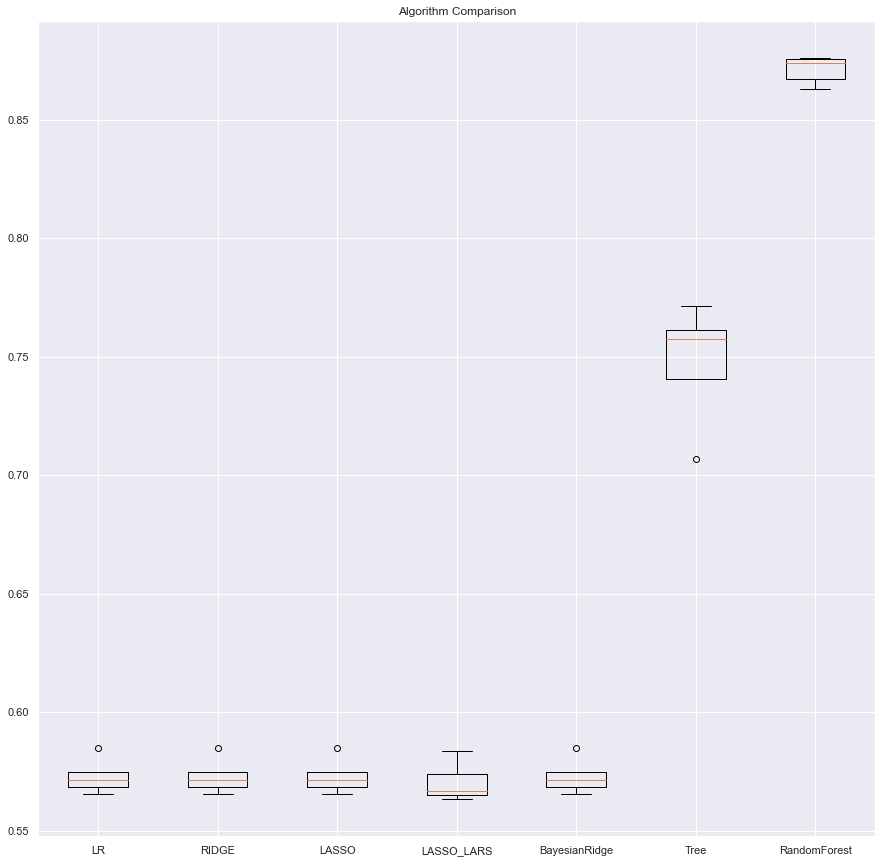

Wall time: 14min 12s


In [144]:
%%time
results = select_model(x_df, y_df, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("base")
results_to_plot.append(results)

LR: 0.573729 (0.004844)
RIDGE: 0.573729 (0.004844)
LASSO: 0.573725 (0.004856)
LASSO_LARS: 0.568478 (0.007188)
BayesianRidge: 0.573730 (0.004847)
Tree: 0.746246 (0.009734)
RandomForest: 0.865584 (0.008004)


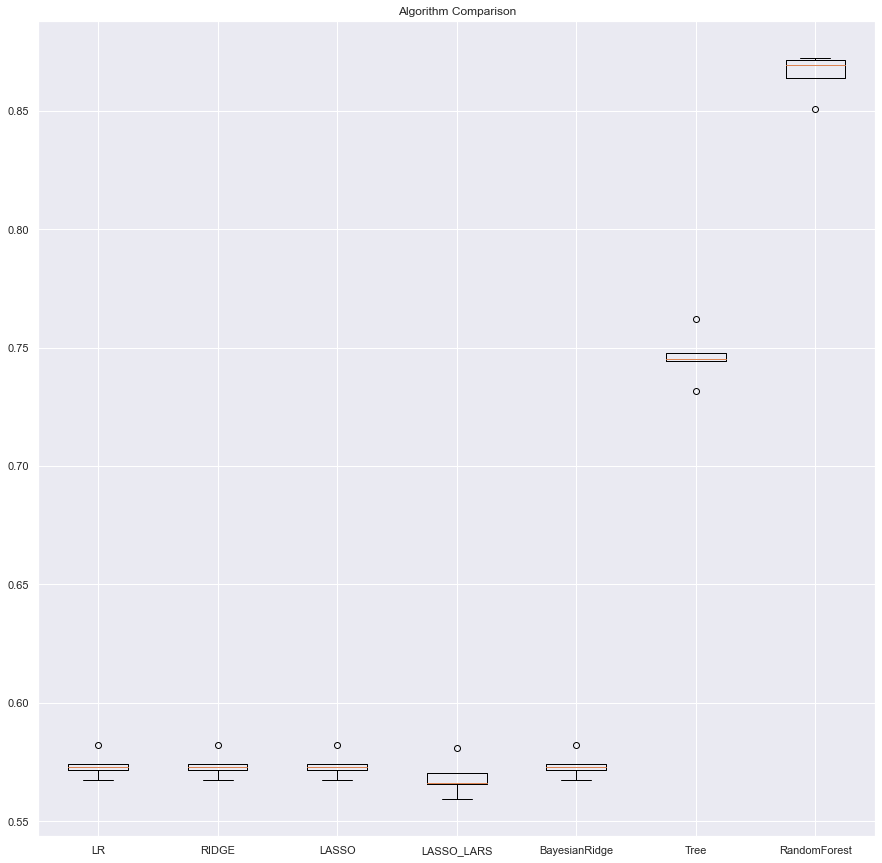

In [146]:
scaler = MinMaxScaler()
x_train_min = scaler.fit_transform(x_df)
results = select_model(x_train, y_train, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Min")
results_to_plot.append(results)

LR: 0.572935 (0.006762)
RIDGE: 0.572938 (0.006763)
LASSO: 0.572938 (0.006773)
LASSO_LARS: 0.565714 (0.007477)
BayesianRidge: 0.572938 (0.006771)
Tree: 0.743962 (0.019577)
RandomForest: 0.872015 (0.005102)


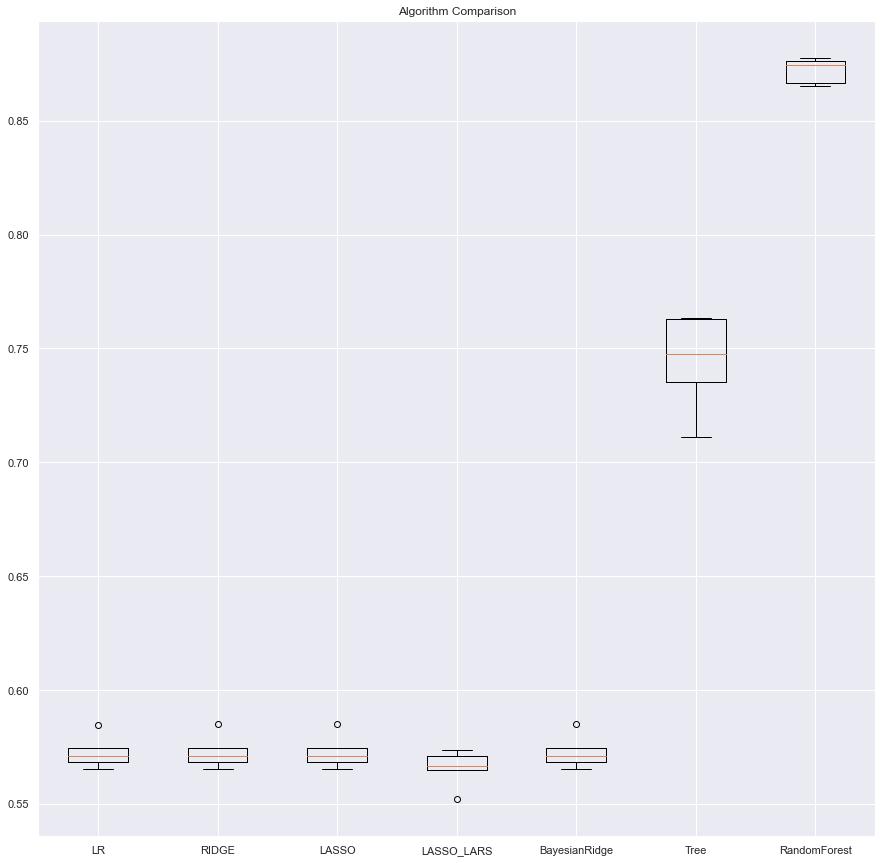

In [148]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_df)
results = select_model(x_train_std, y_df, seed)
results = [results[i].mean() for i in range(len(results))]
results.append("Stand")
results_to_plot.append(results)

In [ ]:
results_to_plot

In [149]:
results_to_plot

[[0.572938245120664,
  0.5729388098175121,
  0.5729350197605629,
  0.5703995319617197,
  0.5729399816402867,
  0.7473866490584176,
  0.8710472367837483,
  'base'],
 [0.5737286077357326,
  0.5737292608862179,
  0.5737253625972263,
  0.568478436525696,
  0.5737300050463146,
  0.7462464475896897,
  0.8655841044552165,
  'Min'],
 [0.5729353008412094,
  0.5729382873364532,
  0.5729376760671935,
  0.5657136245255118,
  0.5729380643021542,
  0.74396243252746,
  0.8720145669543037,
  'Stand']]

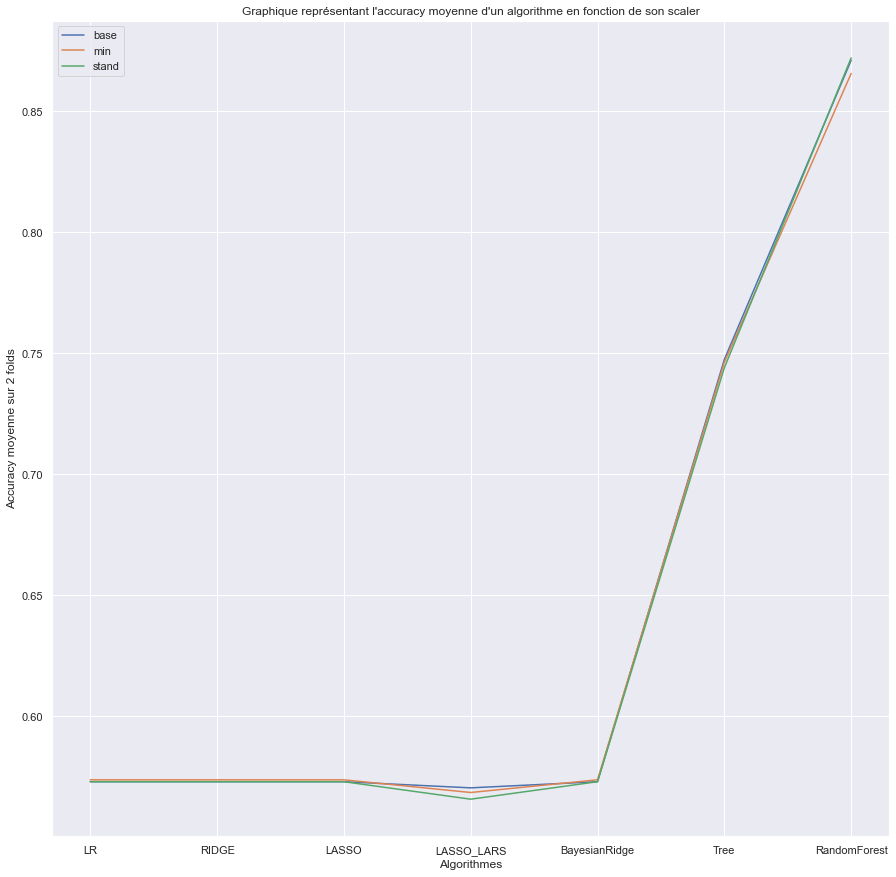

In [150]:
cols_names = ["LR", "RIDGE","LASSO","LASSO_LARS","BayesianRidge","Tree","RandomForest","name"]
results_to_plot = pd.DataFrame(results_to_plot, columns = cols_names)
to_plot = results_to_plot.set_index("name").T
to_plot = to_plot.reset_index()
to_plot.columns = ["algo", "base", "min", "stand"]
ax = to_plot.plot(xticks = to_plot.index, grid = True)
ax.set_xticklabels(to_plot.algo)
plt.xlabel("Algorithmes")
plt.ylabel("Accuracy moyenne sur 2 folds")
plt.title("Graphique représentant l'accuracy moyenne d'un algorithme en fonction de son scaler")
plt.show()

In [ ]:
# Random Forest

### Use our better model

In [ ]:
# with modified data

In [198]:
random_foret = RandomForestRegressor()
random_foret.fit(x_train, y_train)

RandomForestRegressor()

In [202]:
y_pred_rf = random_foret.predict(x_test)
random_foret.score(x_test, y_test)

0.8678884479615502

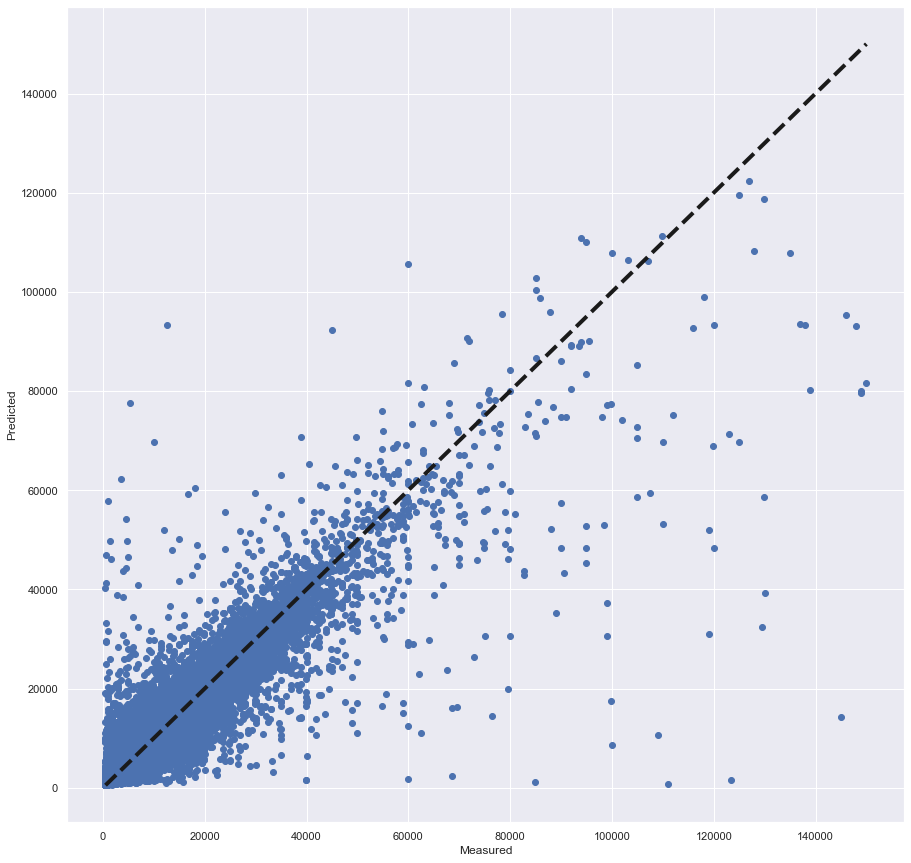

In [203]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [207]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [208]:
y_pred_tree = tree.predict(x_test)
tree.score(x_test, y_test)

0.7494582078962846

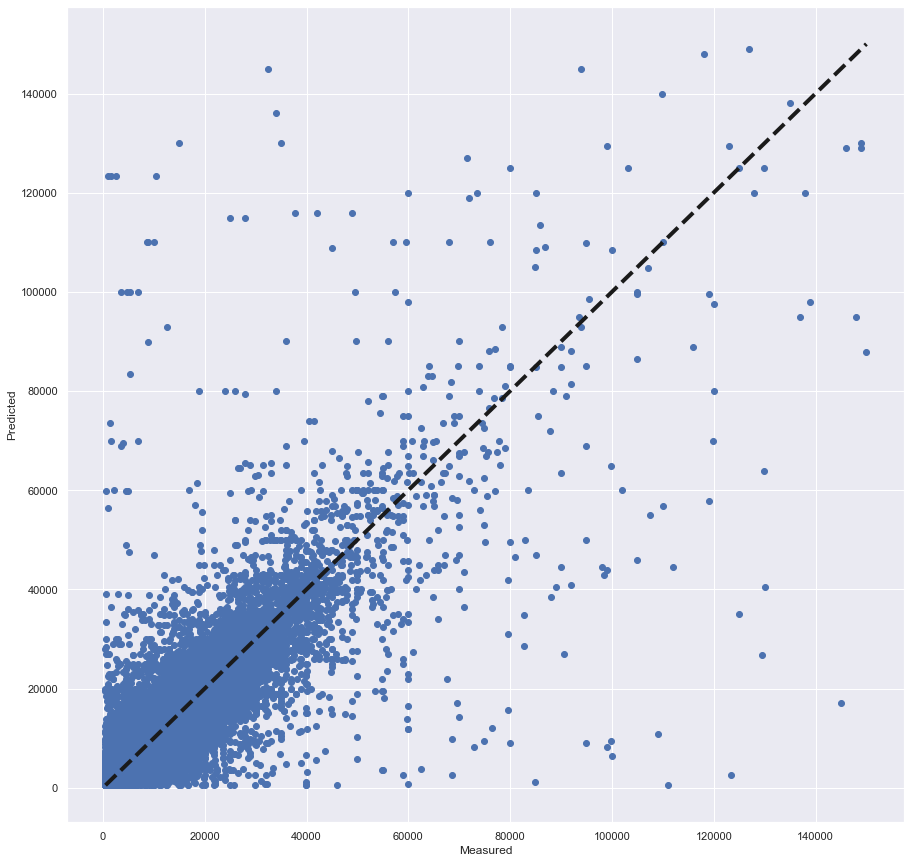

In [209]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_tree)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# with initial data (model, fuel_type, vehicle_type, ... are not transformed in numeric)

In [165]:
df2 = df_plot.copy()

In [167]:
del df2["exploration_date"]
del df2["last_seen"]
del df2["created_date"]

In [168]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2, df2.iloc[:,1] , random_state=1998, test_size=0.3)

In [172]:
# DON'T WORK
# random_foret2 = RandomForestRegressor()
# random_foret2.fit(x_train2, y_train2)

In [ ]:
# y_pred_rf2 = random_foret2.predict(x_test2)
# random_foret2.score(x_test2, y_pred_rf2)

### Use gridSearch for our best model :r andomForest

In [223]:
%%time
model = RandomForestRegressor()
parameters = { 
    'max_depth': (25,50),
    'max_features': ("auto","sqrt","log2"), 
                   }
# with GridSearch
RF_final = GridSearchCV(model, parameters)
RF_final .fit(x_train,y_train)

Wall time: 1h 43min 32s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': (25, 50, 100, 150),
                         'max_features': ('auto', 'sqrt', 'log2')})

In [214]:
y_pred_df_final = RF_final.predict(x_test)

In [224]:
print(RF_final.best_params_)

{'max_depth': 25, 'max_features': 'auto'}


In [220]:
random_foret_best = RandomForestRegressor( max_depth = 50, max_features = 'auto')
random_foret_best.fit(x_train, y_train)

RandomForestRegressor(max_depth=50)

In [221]:
y_pred_rf_best = random_foret_best.predict(x_test)
random_foret_best.score(x_test, y_test)

0.8668015795693134

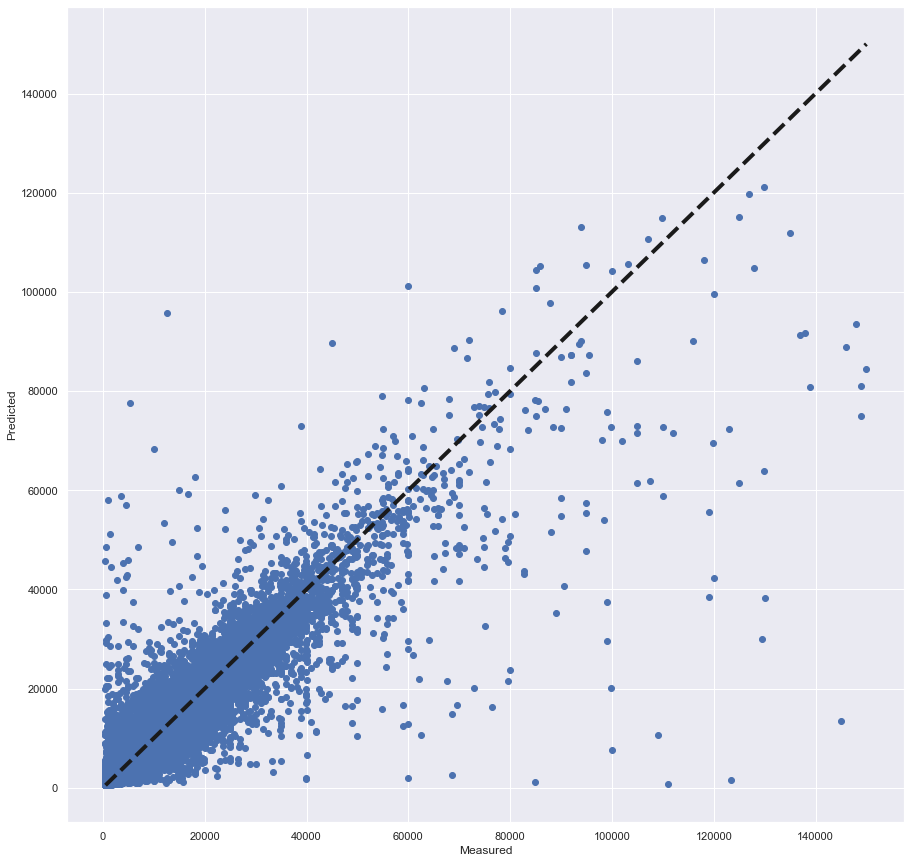

In [222]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf_best)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
# Exportatio of the model
pickle.dump(RF_final, open('final_prediction.pickle', 'wb'))